<a href="https://colab.research.google.com/github/krystianpoczewski/SIOC-1-zajecia/blob/main/sioc_interpolacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
sns.set()

In [ ]:
def sin(x):
  return np.sin(x)
def inverted_sin(x):
  return np.sin(np.power(x, -1))
def sign_sin(x):
  return np.sign(np.sin(8*x))

In [ ]:
def h1(x, offset, width):
  x = x - offset
  return (x >= 0) * (x < width)
def sinc_kernel(x, x0, w, alpha = np.inf):
    """Normalized sine interpolation kernel"""
    x = x - x0
    x = x / w
    return (x >= -alpha) * (x < alpha) * np.sinc(x)
def linear_kernel(x, offset, width):
    x = x - offset
    x = x / width
    return ((1 - np.abs(x)) * (np.abs(x) < 1)).astype(float)

In [ ]:
def MSE(y1, y2):
  return mean_squared_error(y1, y2)

In [ ]:
N = 100
factors = [2, 4, 10]
x_range = np.linspace(-np.pi, np.pi, N)

In [ ]:
y_sin = sin(x_range)
y_inverted = inverted_sin(x_range)
y_sign = sign_sin(x_range)

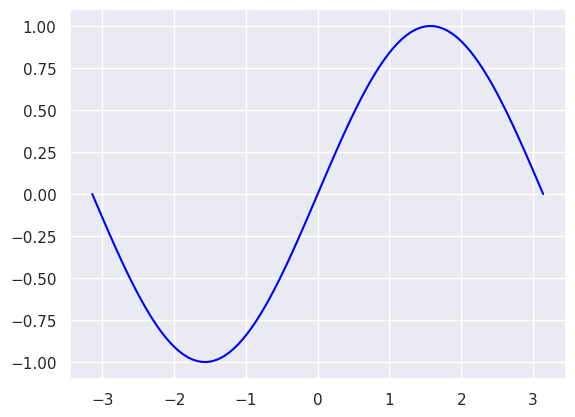

In [ ]:
plt.plot(x_range, y_sin, label='Sin function', color='blue')

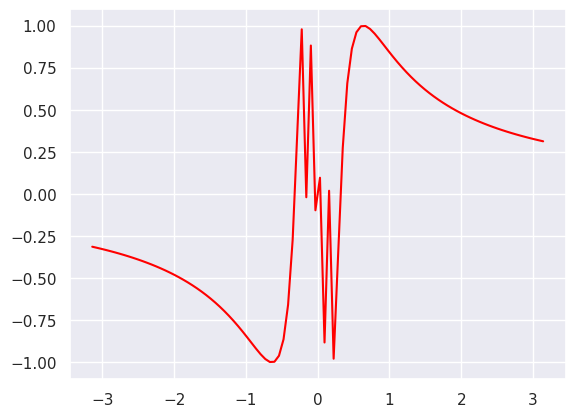

In [ ]:
plt.plot(x_range, y_inverted, label='Inverted sin function', color='red')

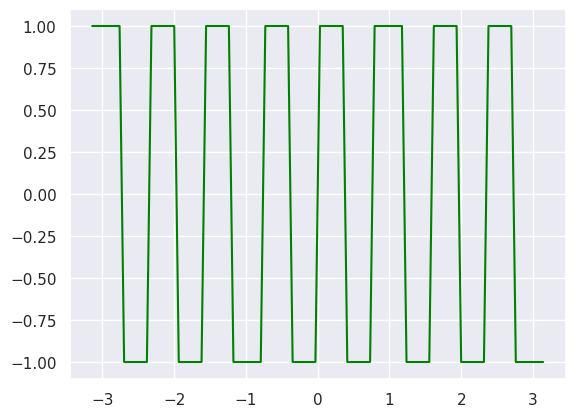

In [ ]:
plt.plot(x_range, y_sign, label='Sign function', color='green')

In [ ]:
diff = np.diff(x_range)[0]

In [ ]:
w = np.diff(x_range)[0]
w

0.06346651825433947

In [ ]:
kernels = []

for xsample, ysample in zip(x_range, y_sin):
    xk = np.linspace(-np.pi, np.pi, N*factors[0])
    k = ysample * h1(xk, offset=xsample, width=w)
    kernels.append(k)

In [ ]:
kernels = np.asarray(kernels)
kernels.shape

(100, 200)

In [ ]:
yinterp = kernels.sum(axis=0)

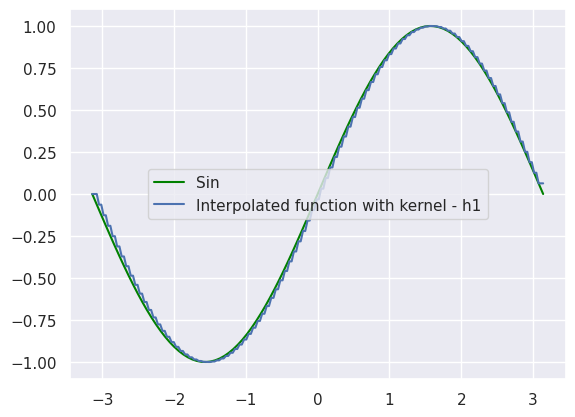

In [ ]:
plt.plot(x_range, y_sin, label='Sin', color='Green')
plt.plot(xk, yinterp, label=f'Interpolated function with kernel - h1')
plt.legend()

In [ ]:
f"{(mean_squared_error(yinterp, sin(xk)) / np.std(np.sin(xk))):.4%}"

'0.0977%'

'0.3427%'

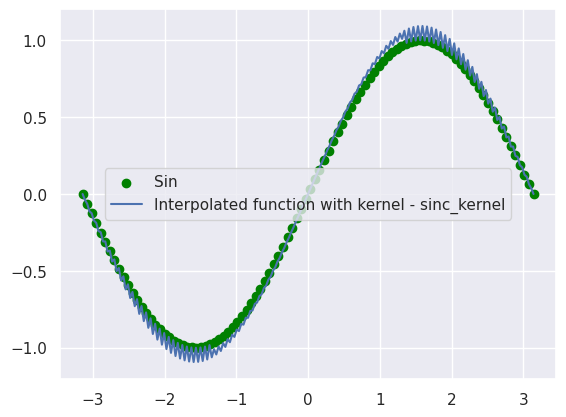

In [ ]:
kernels = []

for xsample, ysample in zip(x_range, y_sin):
    xk = np.linspace(-np.pi, np.pi, N*factors[0])
    k = ysample * sinc_kernel(xk, x0=xsample, w=w, alpha=np.pi)
    kernels.append(k)

kernels = np.asarray(kernels)
kernels.shape

yinterp = kernels.sum(axis=0)

plt.scatter(x_range, y_sin, label='Sin', color='Green')
plt.plot(xk, yinterp, label=f'Interpolated function with kernel - sinc_kernel')
plt.legend()

f"{(mean_squared_error(yinterp, sin(xk)) / np.std(np.sin(xk))):.4%}"

(100, 200)


'0.0000%'

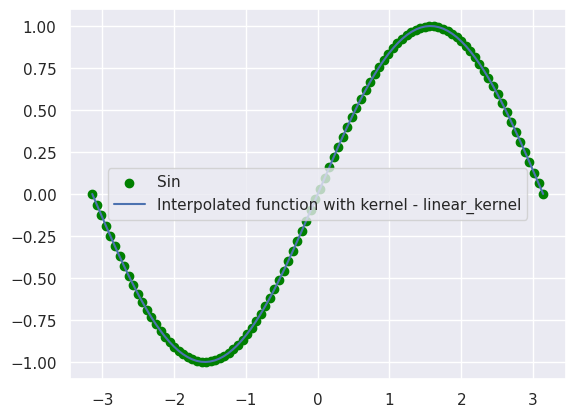

In [ ]:
kernels = []

for xsample, ysample in zip(x_range, y_sin):
    xk = np.linspace(-np.pi, np.pi, N*factors[0])
    k = ysample * linear_kernel(xk, xsample, w)
    kernels.append(k)

kernels = np.asarray(kernels)
print(kernels.shape)

yinterp = kernels.sum(axis=0)

plt.scatter(x_range, y_sin, label='Sin', color='Green')
plt.plot(xk, yinterp, label=f'Interpolated function with kernel - linear_kernel')
plt.legend()

f"{(mean_squared_error(yinterp, sin(xk)) / np.std(np.sin(xk))):.4%}"

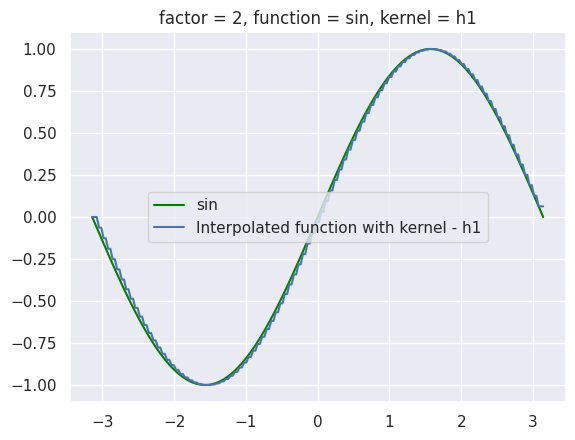

0.0977%


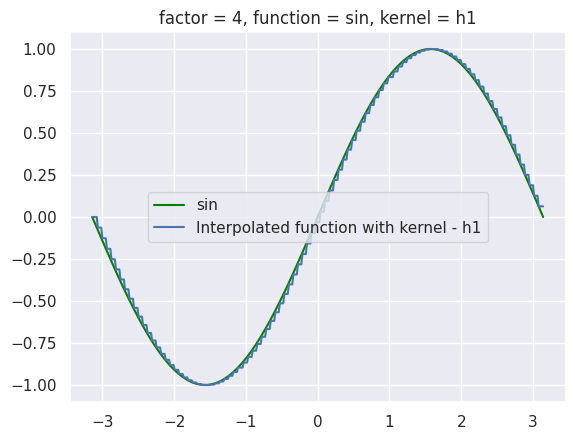

0.0959%


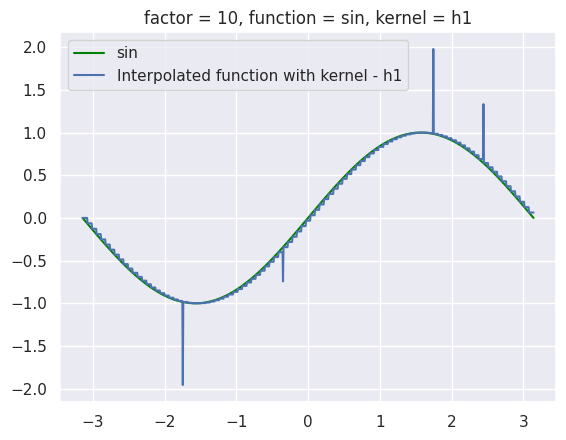

0.4585%


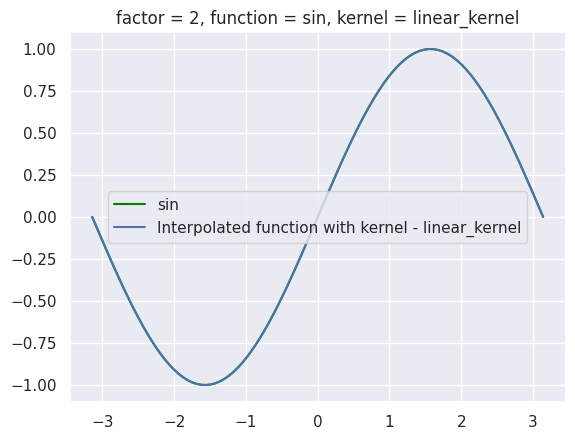

0.0000%


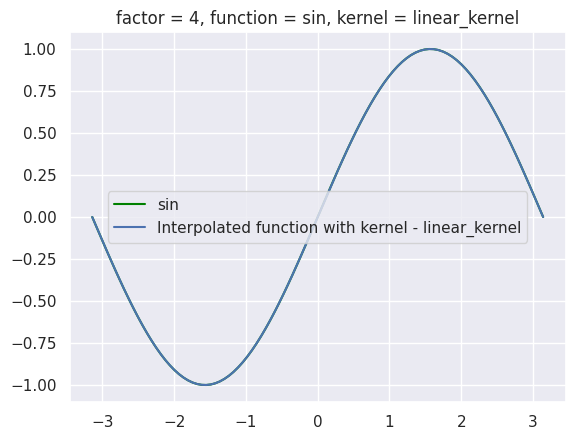

0.0000%


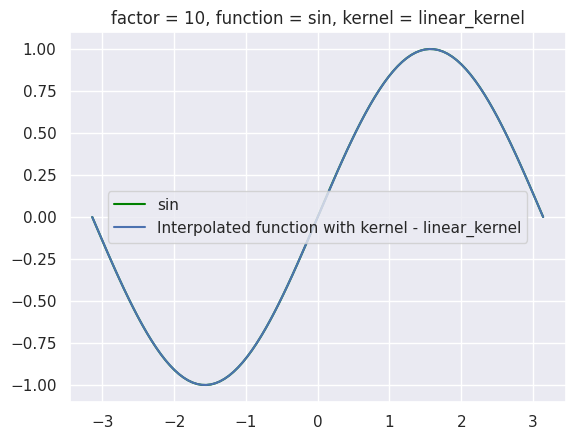

0.0000%


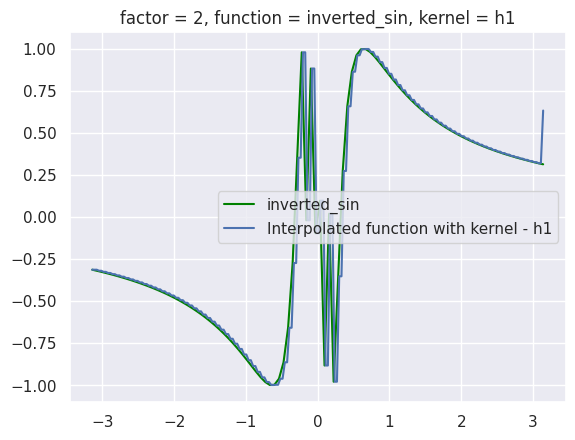

9.7212%


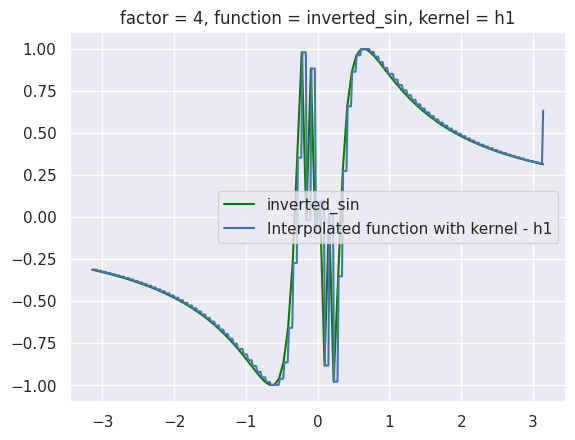

10.5679%


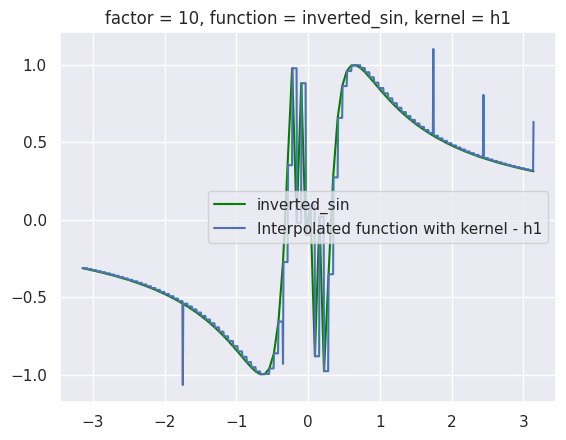

9.7864%


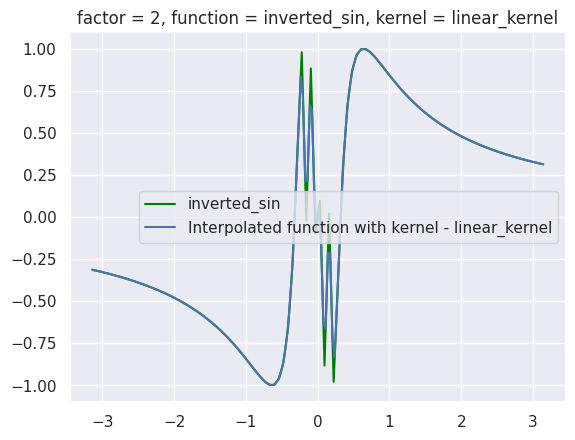

5.7873%


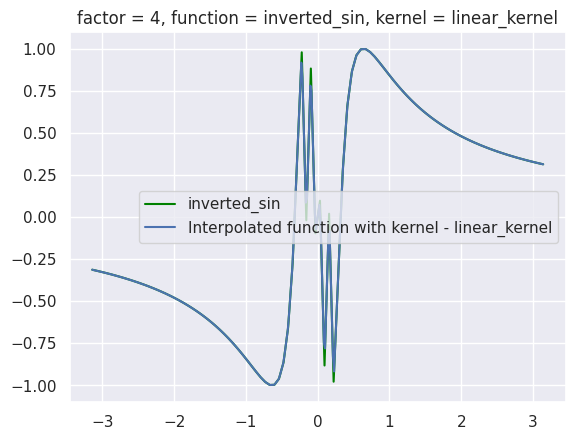

6.9168%


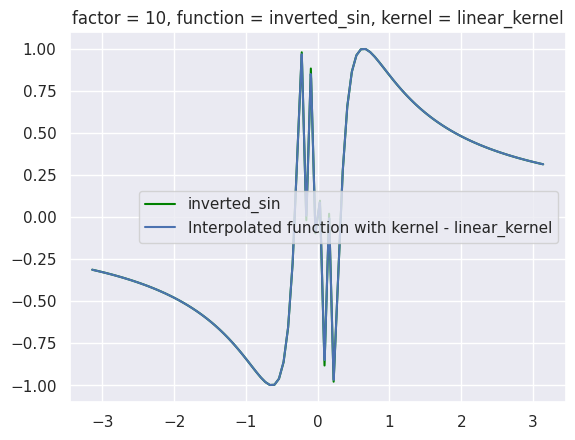

6.0327%


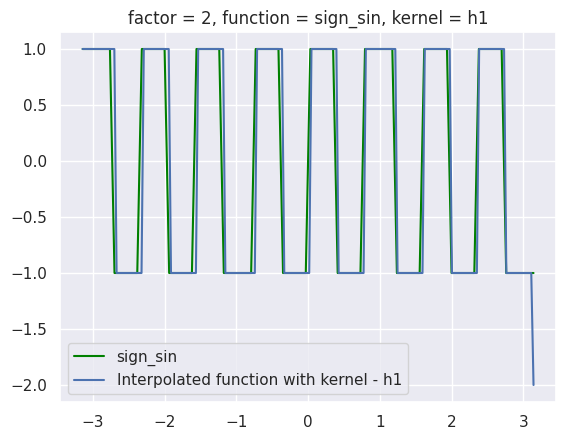

30.5000%


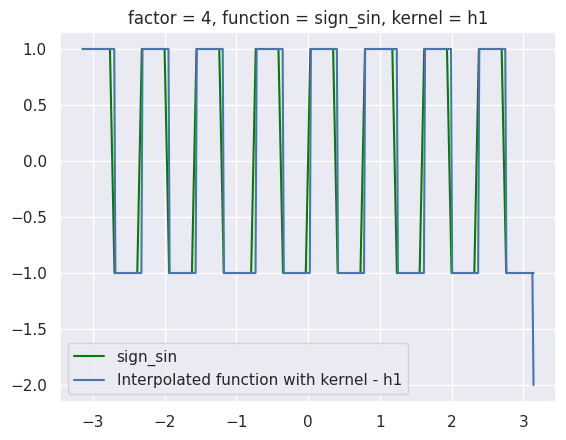

30.2500%


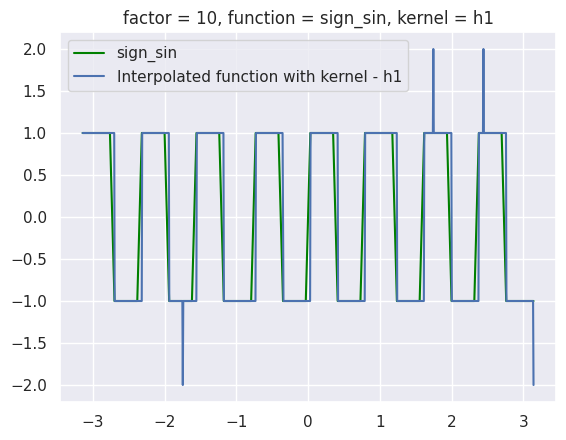

30.5000%


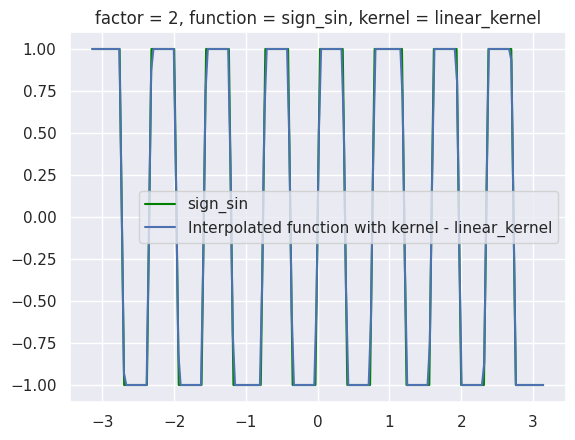

9.8927%


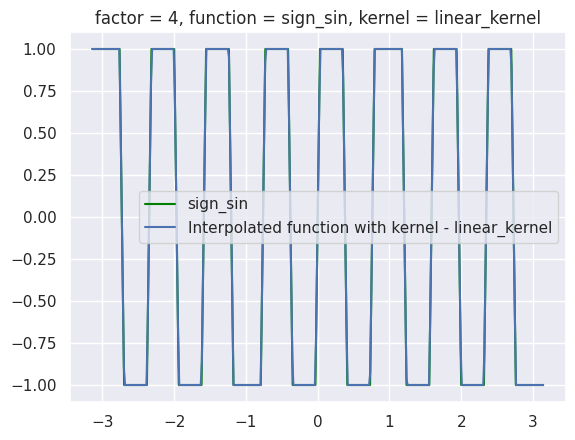

9.7202%


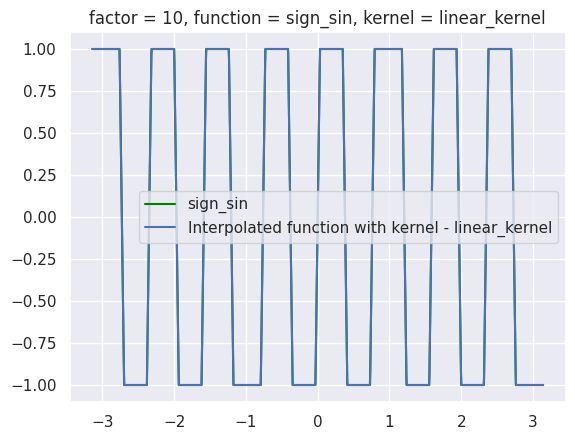

9.5791%


In [ ]:
for func in [sin, inverted_sin, sign_sin]:
  for kernel in [h1, linear_kernel]:
    for factor in factors:
      xk = np.linspace(-np.pi, np.pi, N*factor)

      kernels = []
      for xsample, ysample in zip(x_range, func(x_range)):
        k = ysample * kernel(xk, xsample, w)
        kernels.append(k)

      kernels = np.asarray(kernels)
      yinterp = kernels.sum(axis=0)

      plt.title(f'factor = {factor}, function = {func.__name__}, kernel = {kernel.__name__}')
      plt.plot(x_range, func(x_range), label=f'{func.__name__}', color='Green')
      plt.plot(xk, yinterp, label=f'Interpolated function with kernel - {kernel.__name__}')
      plt.legend()
      plt.show()
      print(f"{(mean_squared_error(yinterp, func(xk)) / np.std(func(xk))):.4%}")

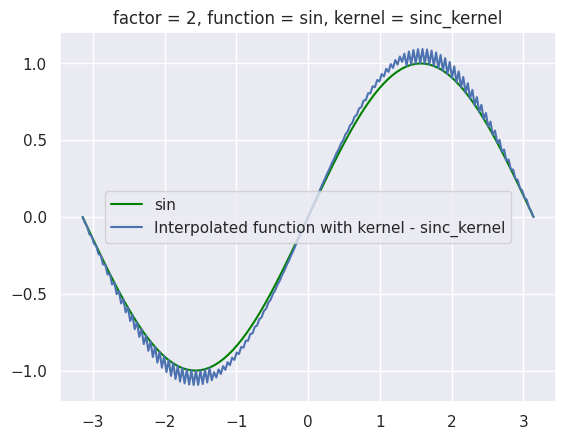

0.3427%


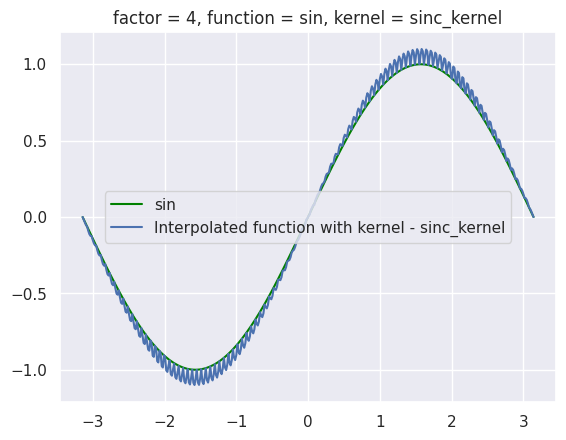

0.3547%


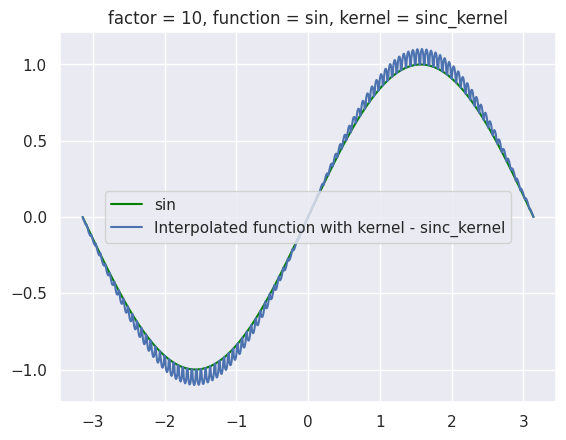

0.3547%


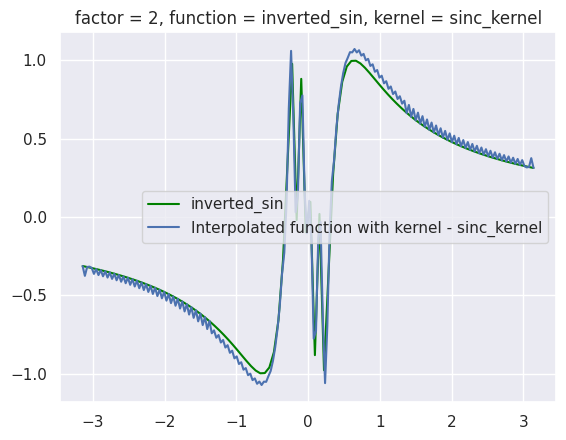

6.7620%


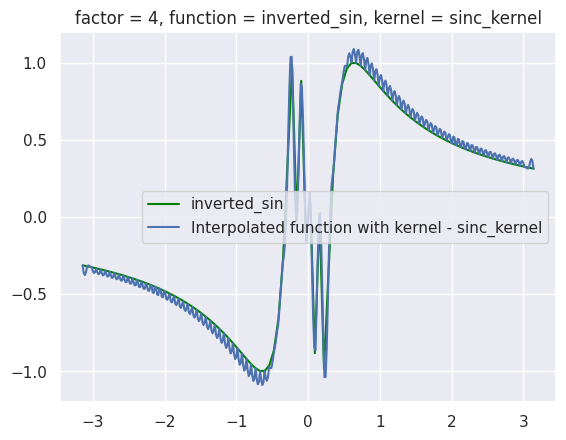

7.9562%


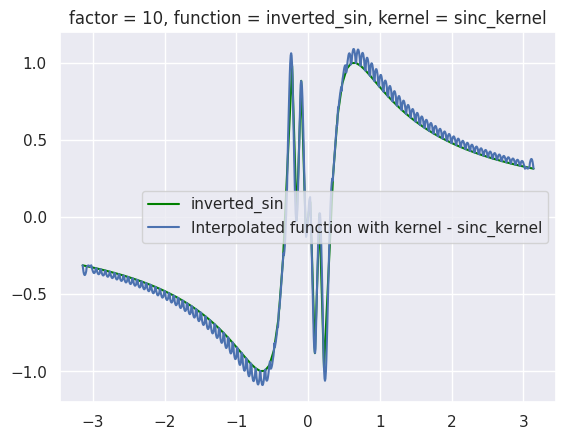

6.9511%


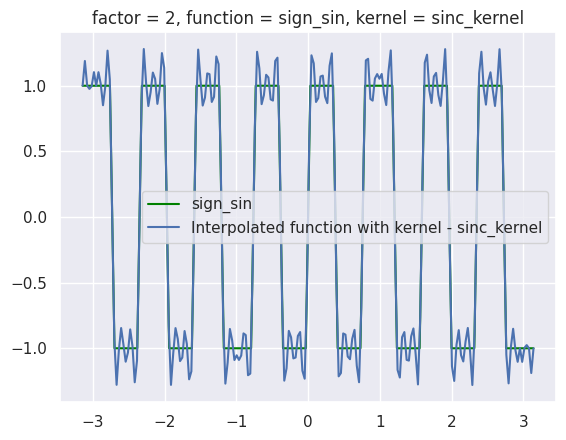

11.6389%


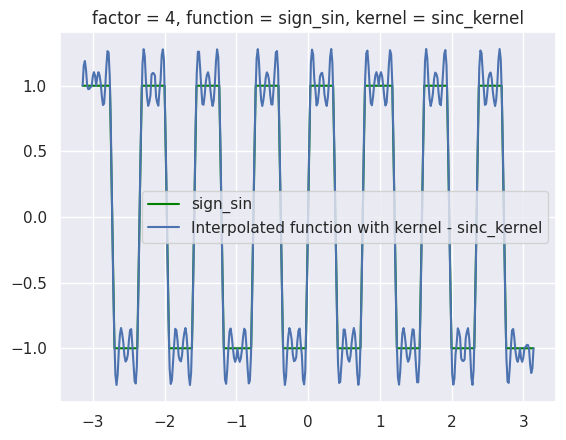

11.5136%


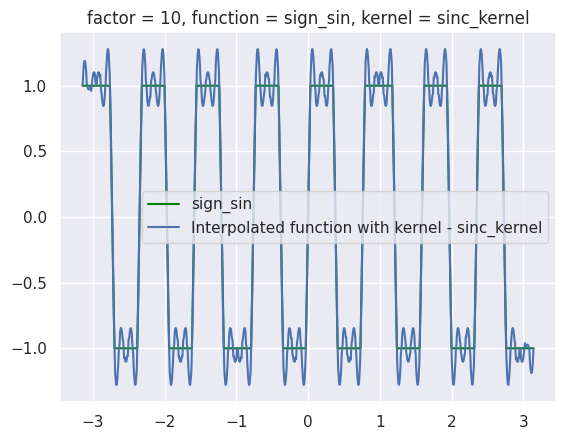

11.2880%


In [ ]:
for func in [sin, inverted_sin, sign_sin]:
  for factor in factors:
    xk = np.linspace(-np.pi, np.pi, N*factor)
    kernels = []
    for xsample, ysample in zip(x_range, func(x_range)):
      k = ysample * sinc_kernel(xk, xsample, w, np.pi)
      kernels.append(k)

    kernels = np.asarray(kernels)
    yinterp = kernels.sum(axis=0)

    plt.title(f'factor = {factor}, function = {func.__name__}, kernel = sinc_kernel')
    plt.plot(x_range, func(x_range), label=f'{func.__name__}', color='Green')
    plt.plot(xk, yinterp, label=f'Interpolated function with kernel - sinc_kernel')
    plt.legend()
    plt.show()
    print(f"{(mean_squared_error(yinterp, func(xk)) / np.std(func(xk))):.4%}")

In [ ]:
def conv1d_interpolate(x_measure, y_measure, x_interpolate, kernel):
    """
    Interpolate using a convolution kernel

    :param x_measure: x values of the measurements
    :param y_measure: y values of the measurements
    :param x_interpolate: x values of the interpolation
    :param kernel: callable interpolation kernel accepting x, offset and width

    :return: y values of the interpolation
    """
    width = x_measure[1] - x_measure[0]  # store period between samples
    kernels = [kernel(x_interpolate, offset=offset, width=width) for offset in x_measure]

    return y_measure @ kernels

In [ ]:
def plot_interpolation(x_range, true_function, x_interpolate, interpolated_values, title):
    plt.plot(x_range, true_function(x_range), label=f'True Function', color='green')
    plt.scatter(x_interpolate, interpolated_values, label=f'Interpolated Function')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
def interpolate_plot(x_range, functions, kernels, factors, N):
  for func in functions:
    for kernel in kernels:
      for factor in factors:
        xk = np.linspace(-np.pi, np.pi, N * factor)
        yinterp = conv1d_interpolate(x_range, func(x_range), xk, kernel)

        mse_percentage = mean_squared_error(yinterp, func(xk)) / np.std(func(xk))
        print(f"{func.__name__}, Kernel: {kernel.__name__}, Factor: {factor}, MSE: {mse_percentage:.4%}")

        plot_interpolation(x_range, func, xk, yinterp, f'{func.__name__}, Kernel: {kernel.__name__}, Factor: {factor}')

In [ ]:
def interpolate_plot_for_x_values(x_range, x_interp, functions, kernels, factors, N):
  for func in functions:
    for kernel in kernels:
      for factor in factors:
        yinterp = conv1d_interpolate(x_range, func(x_range), x_interp, kernel)

        mse_percentage = mean_squared_error(yinterp, func(x_interp)) / np.std(func(x_interp))
        print(f"{func.__name__}, Kernel: {kernel.__name__}, Factor: {factor}, MSE: {mse_percentage:.4%}")

        plot_interpolation(x_range, func, x_interp, yinterp, f'{func.__name__}, Kernel: {kernel.__name__}, Factor: {factor}')

sin, Kernel: h1, Factor: 2, MSE: 0.0977%


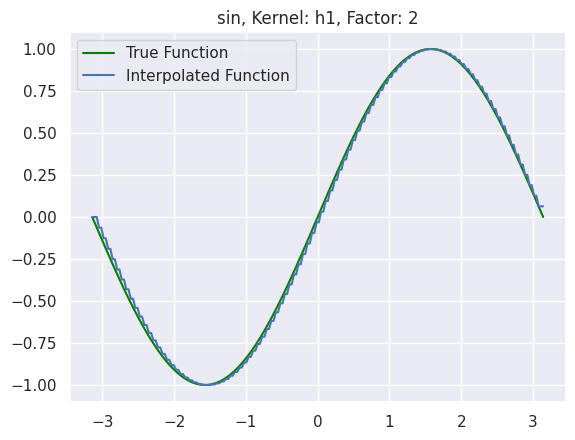

sin, Kernel: h1, Factor: 4, MSE: 0.0959%


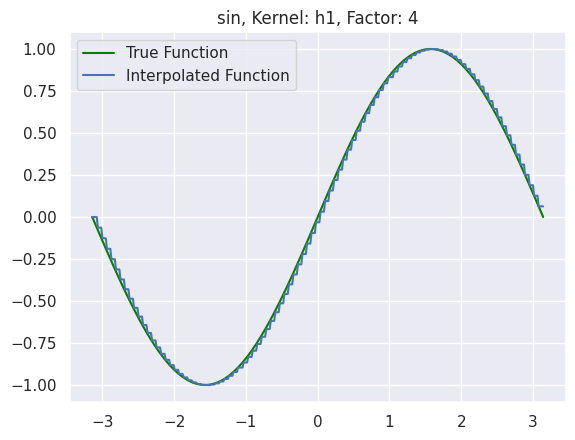

sin, Kernel: h1, Factor: 10, MSE: 0.4585%


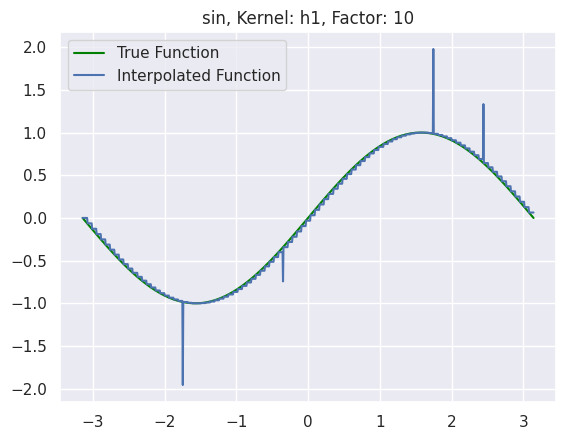

sin, Kernel: linear_kernel, Factor: 2, MSE: 0.0000%


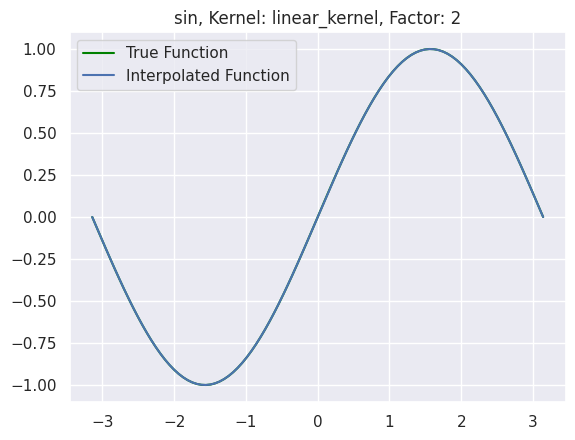

sin, Kernel: linear_kernel, Factor: 4, MSE: 0.0000%


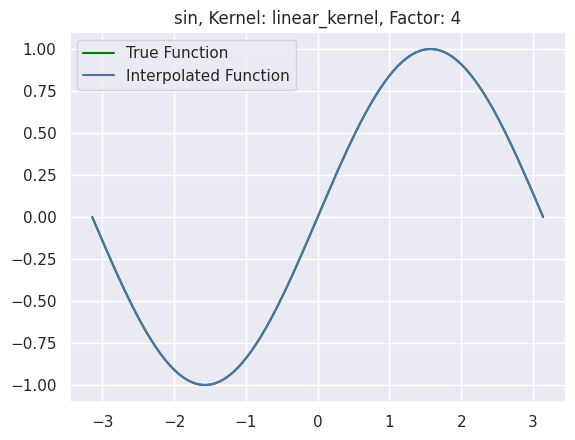

sin, Kernel: linear_kernel, Factor: 10, MSE: 0.0000%


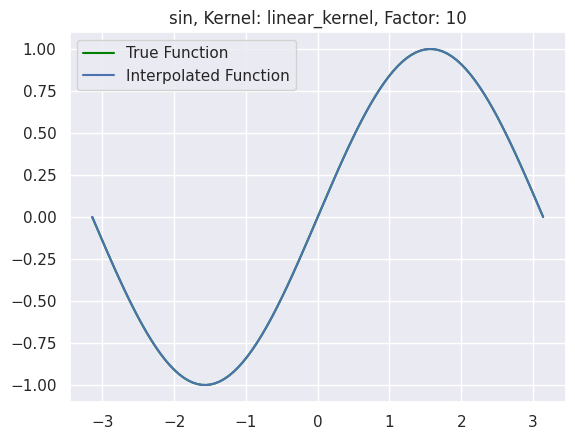

inverted_sin, Kernel: h1, Factor: 2, MSE: 9.7212%


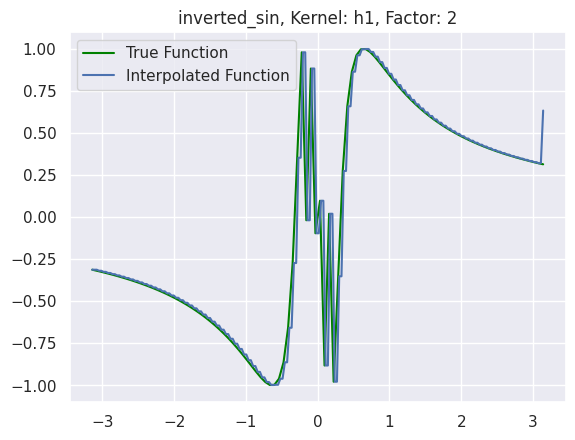

inverted_sin, Kernel: h1, Factor: 4, MSE: 10.5679%


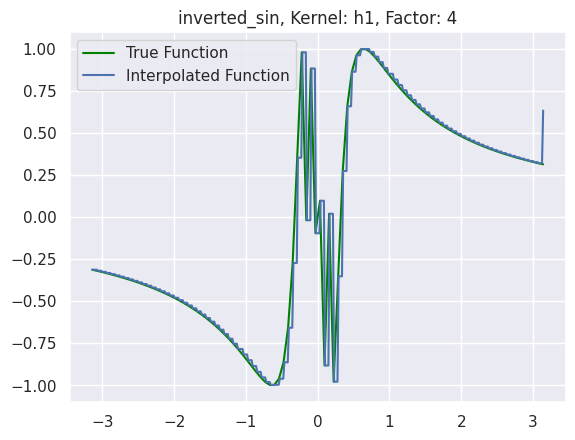

inverted_sin, Kernel: h1, Factor: 10, MSE: 9.7864%


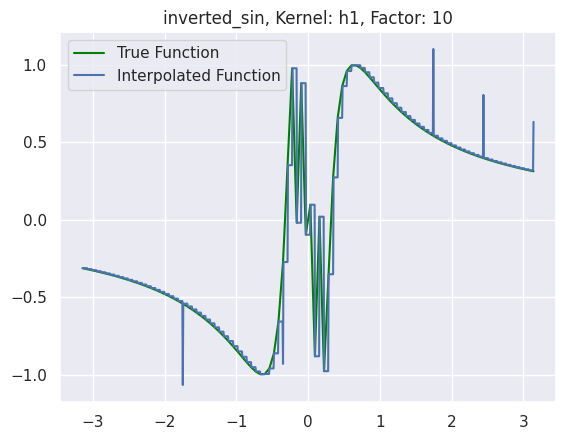

inverted_sin, Kernel: linear_kernel, Factor: 2, MSE: 5.7873%


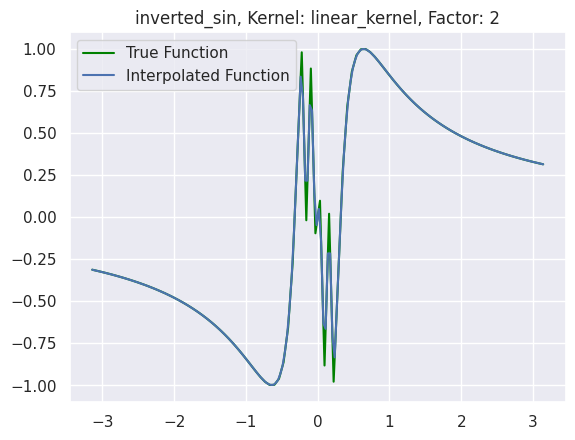

inverted_sin, Kernel: linear_kernel, Factor: 4, MSE: 6.9168%


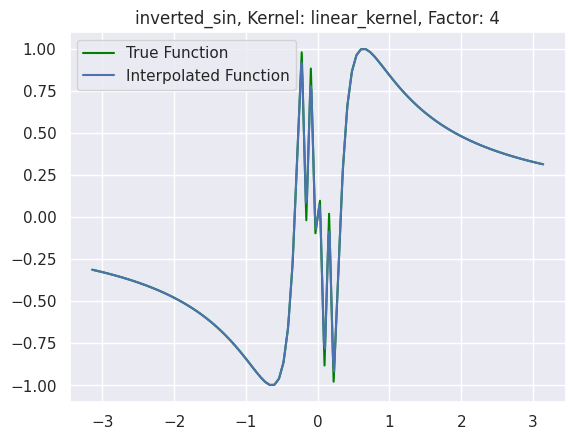

inverted_sin, Kernel: linear_kernel, Factor: 10, MSE: 6.0327%


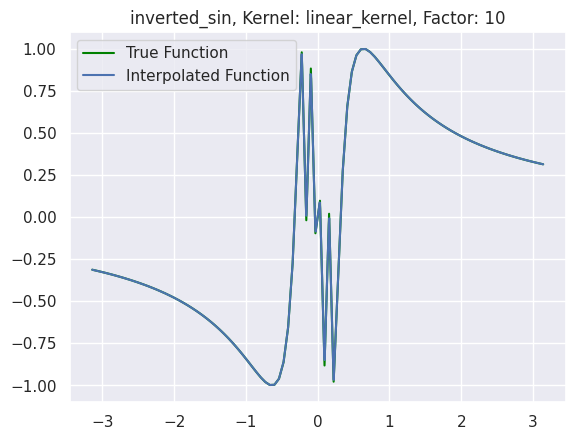

sign_sin, Kernel: h1, Factor: 2, MSE: 30.5000%


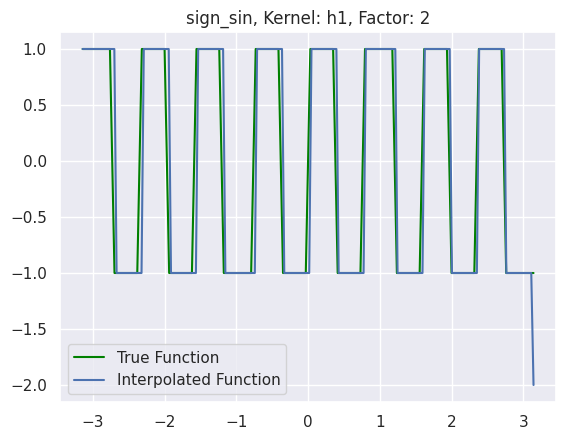

sign_sin, Kernel: h1, Factor: 4, MSE: 30.2500%


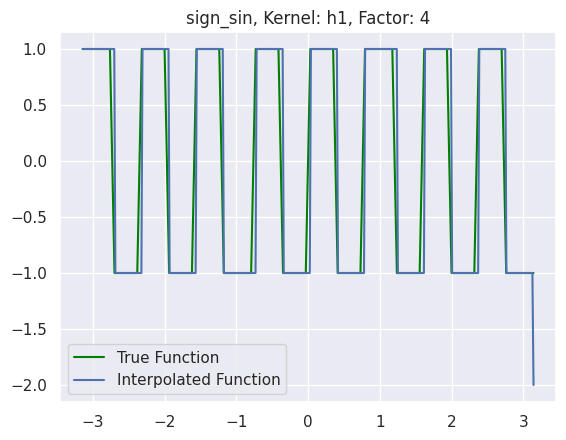

sign_sin, Kernel: h1, Factor: 10, MSE: 30.5000%


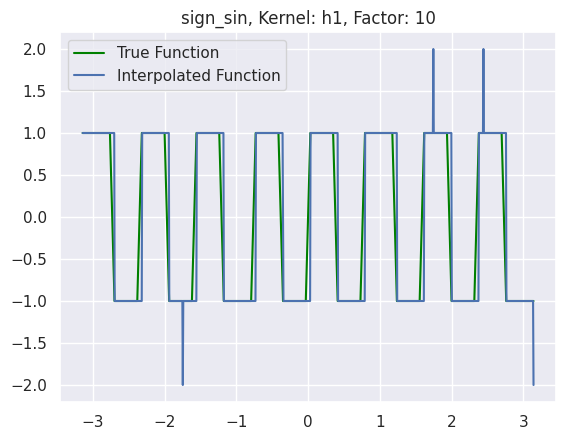

sign_sin, Kernel: linear_kernel, Factor: 2, MSE: 9.8927%


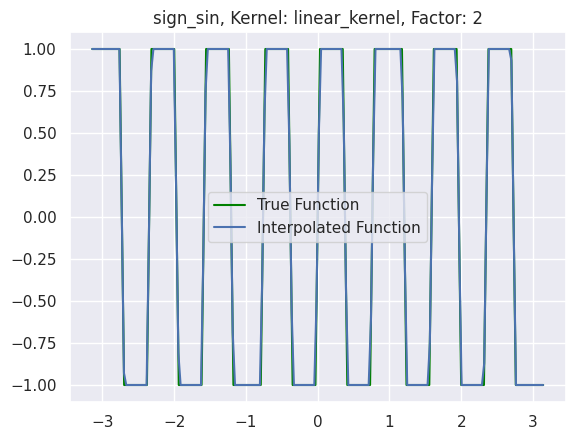

sign_sin, Kernel: linear_kernel, Factor: 4, MSE: 9.7202%


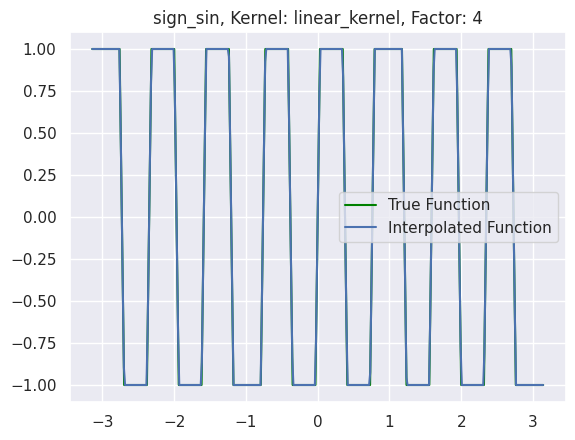

sign_sin, Kernel: linear_kernel, Factor: 10, MSE: 9.5791%


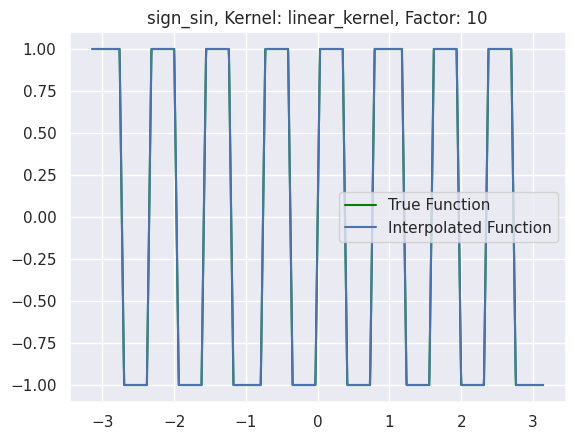

In [ ]:
interpolate_plot(x_range, [sin, inverted_sin, sign_sin], [h1, linear_kernel], factors, N)

In [ ]:
uniform_points = np.linspace(-np.pi, np.pi, N)

sin, Kernel: h1, Factor: 2, MSE: 50.1246%


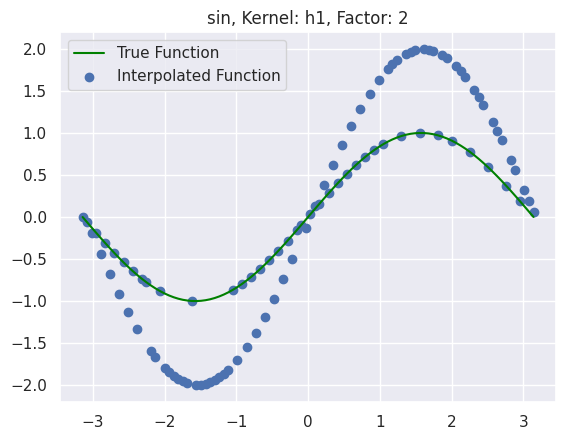

sin, Kernel: h1, Factor: 4, MSE: 50.1246%


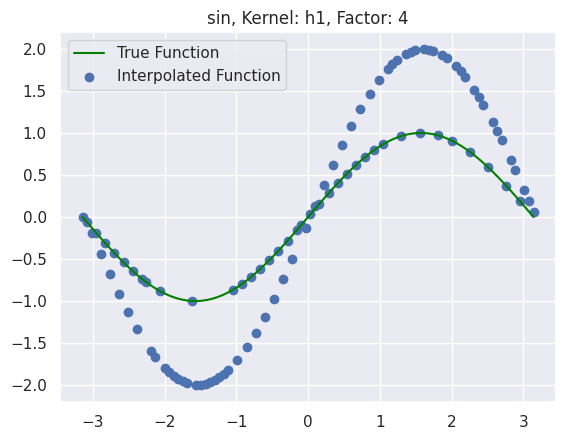

sin, Kernel: h1, Factor: 10, MSE: 50.1246%


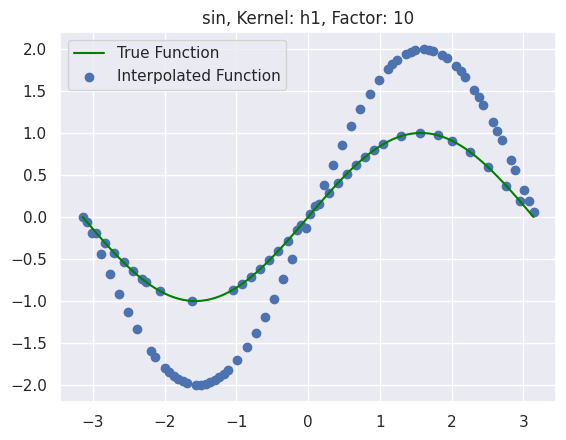

sin, Kernel: linear_kernel, Factor: 2, MSE: 0.0000%


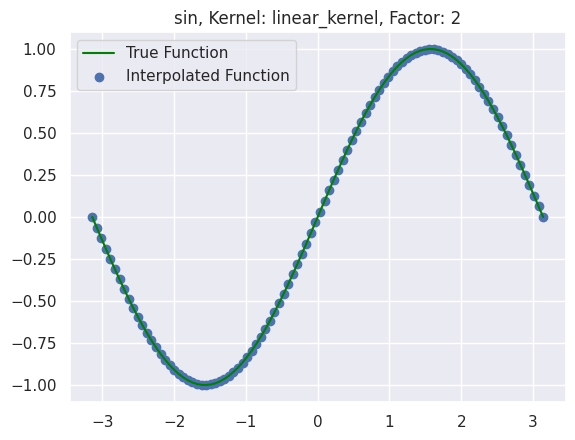

sin, Kernel: linear_kernel, Factor: 4, MSE: 0.0000%


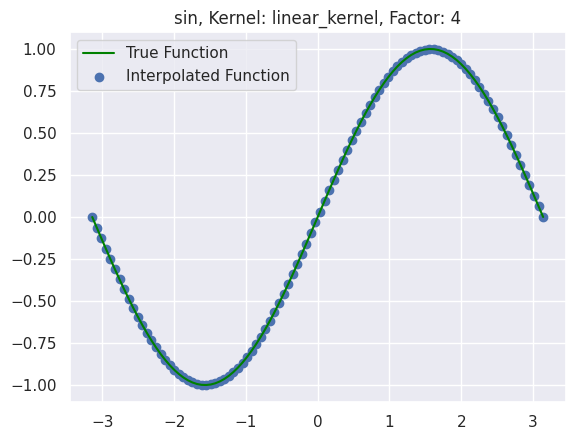

sin, Kernel: linear_kernel, Factor: 10, MSE: 0.0000%


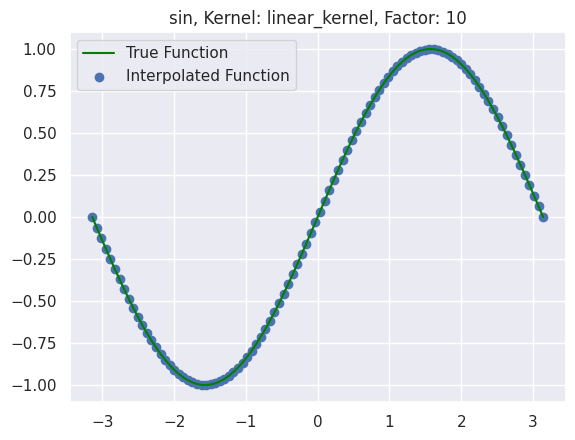

inverted_sin, Kernel: h1, Factor: 2, MSE: 36.8128%


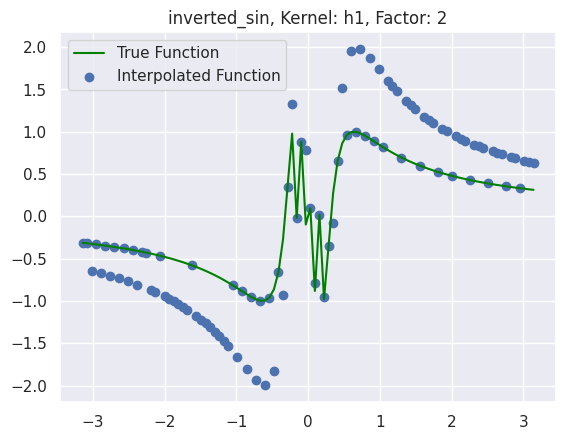

inverted_sin, Kernel: h1, Factor: 4, MSE: 36.8128%


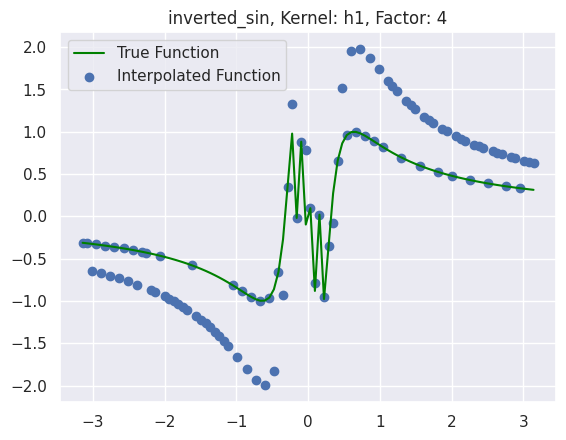

inverted_sin, Kernel: h1, Factor: 10, MSE: 36.8128%


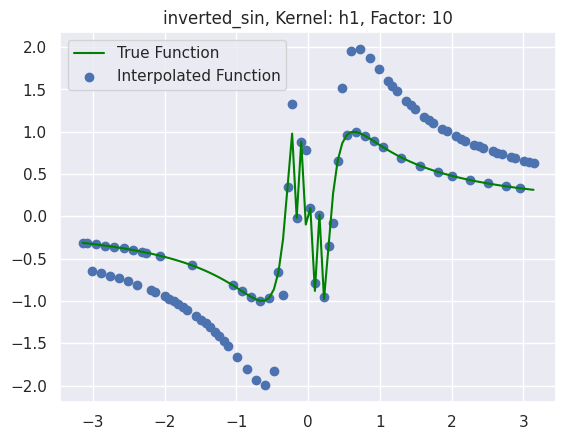

inverted_sin, Kernel: linear_kernel, Factor: 2, MSE: 0.0000%


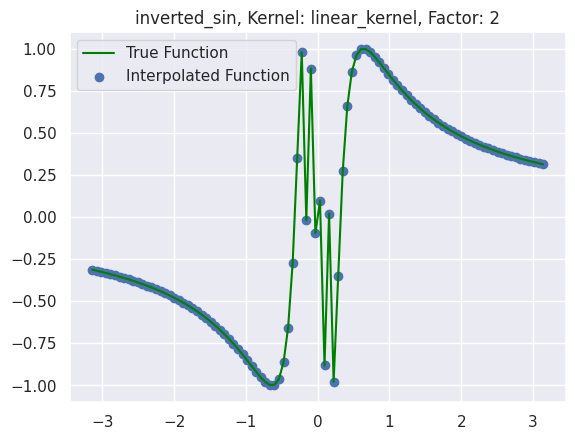

inverted_sin, Kernel: linear_kernel, Factor: 4, MSE: 0.0000%


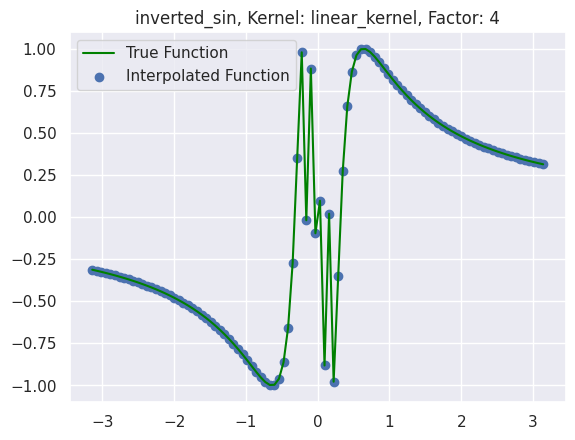

inverted_sin, Kernel: linear_kernel, Factor: 10, MSE: 0.0000%


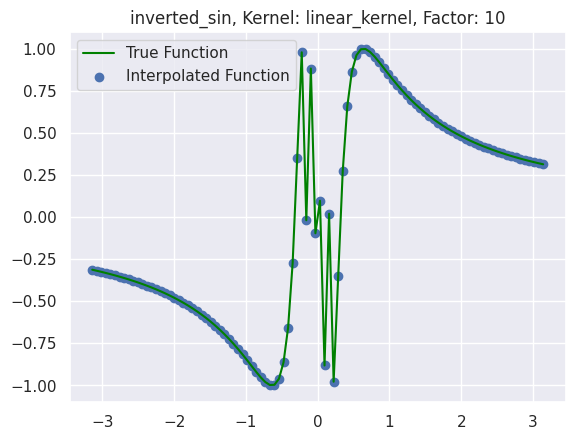

sign_sin, Kernel: h1, Factor: 2, MSE: 63.0000%


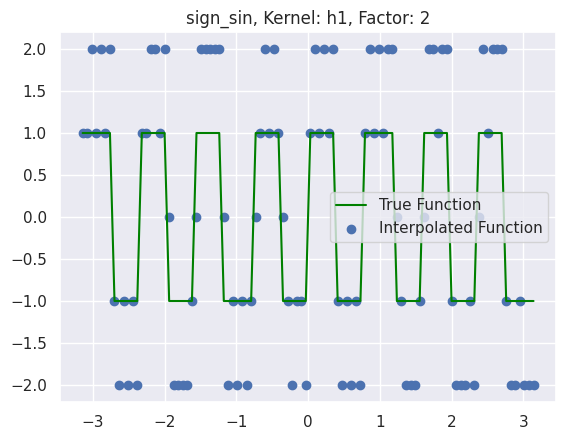

sign_sin, Kernel: h1, Factor: 4, MSE: 63.0000%


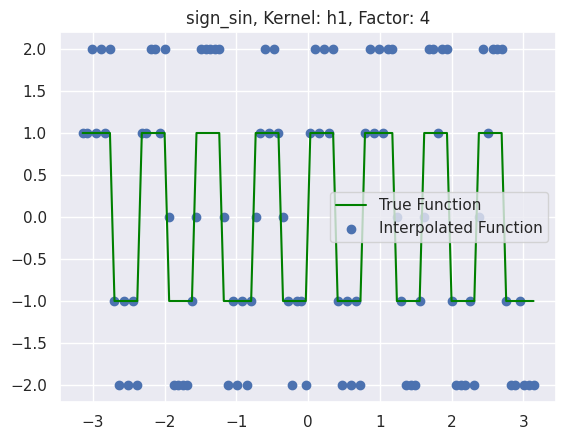

sign_sin, Kernel: h1, Factor: 10, MSE: 63.0000%


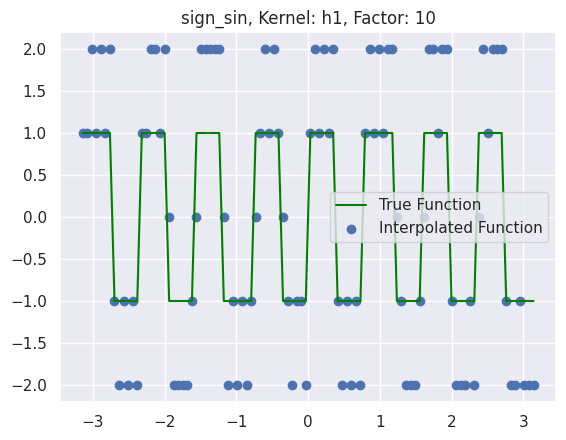

sign_sin, Kernel: linear_kernel, Factor: 2, MSE: 0.0000%


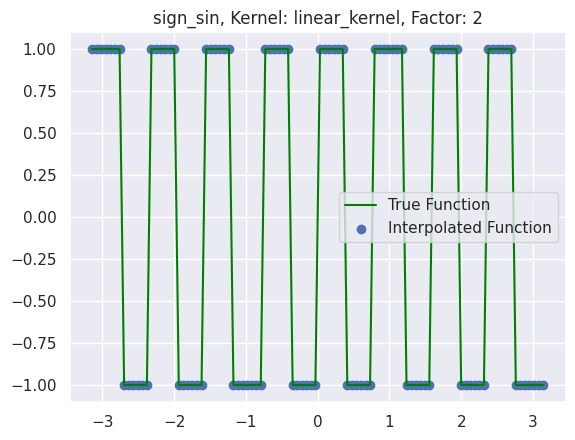

sign_sin, Kernel: linear_kernel, Factor: 4, MSE: 0.0000%


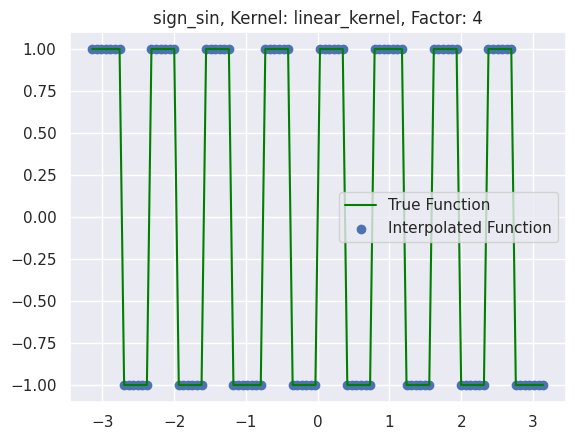

sign_sin, Kernel: linear_kernel, Factor: 10, MSE: 0.0000%


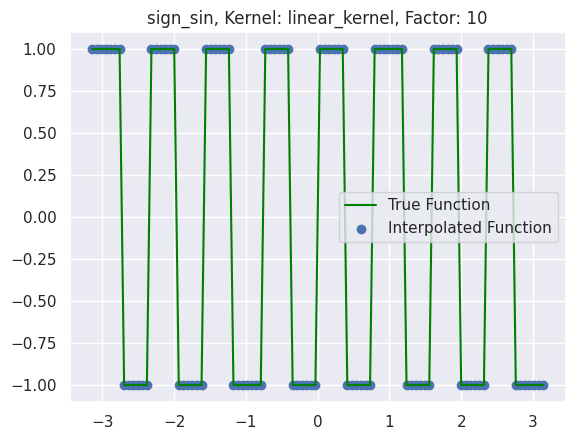

In [ ]:
interpolate_plot_for_x_values(x_range, uniform_points, [sin, inverted_sin, sign_sin], [h1, linear_kernel], factors, N)

In [ ]:
mean, std_dev = 0, np.pi / 4
random_points = np.random.normal(mean, std_dev, N)

sin, Kernel: h1, Factor: 2, MSE: 0.1408%


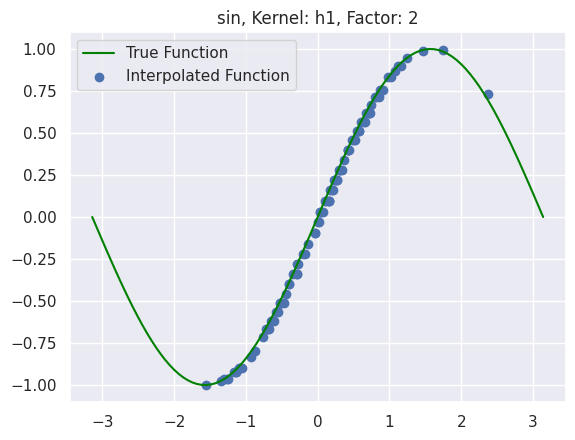

sin, Kernel: h1, Factor: 4, MSE: 0.1408%


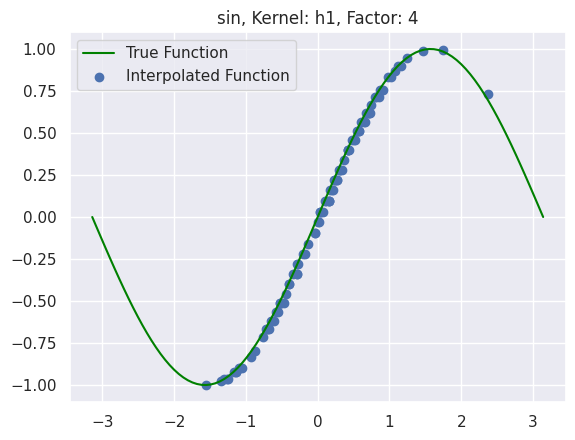

sin, Kernel: h1, Factor: 10, MSE: 0.1408%


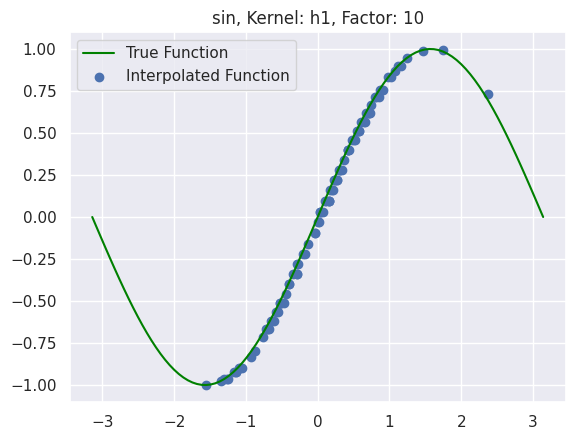

sin, Kernel: linear_kernel, Factor: 2, MSE: 0.0000%


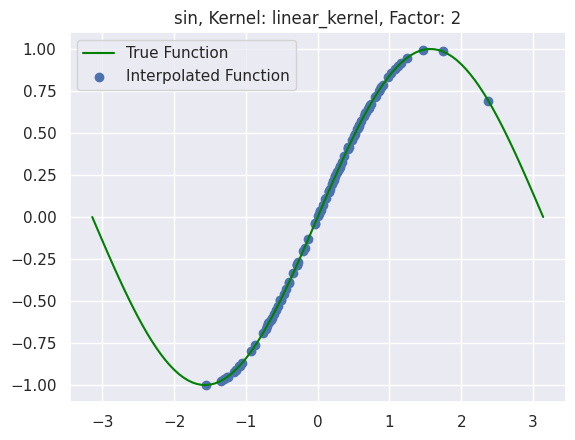

sin, Kernel: linear_kernel, Factor: 4, MSE: 0.0000%


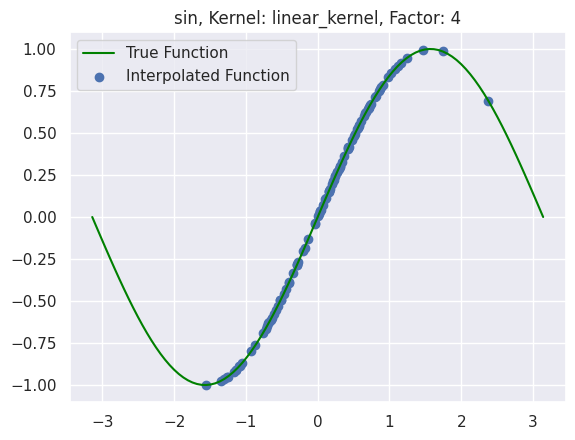

sin, Kernel: linear_kernel, Factor: 10, MSE: 0.0000%


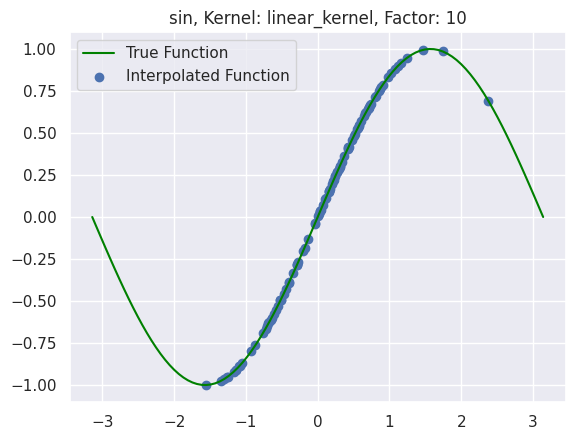

inverted_sin, Kernel: h1, Factor: 2, MSE: 23.2467%


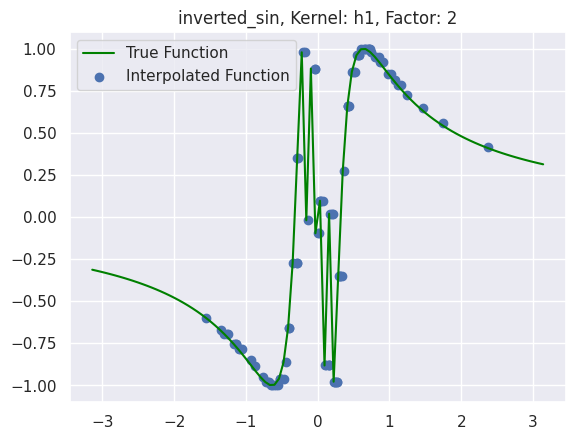

inverted_sin, Kernel: h1, Factor: 4, MSE: 23.2467%


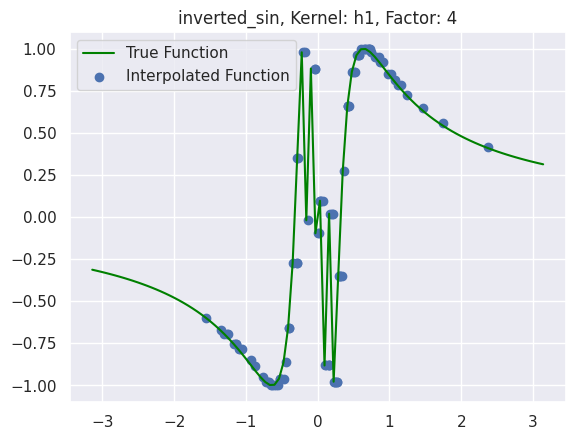

inverted_sin, Kernel: h1, Factor: 10, MSE: 23.2467%


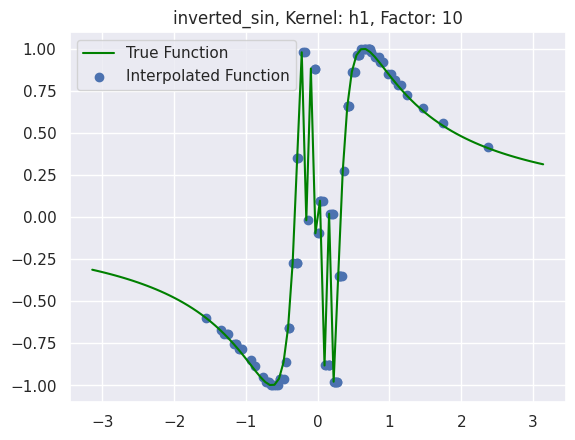

inverted_sin, Kernel: linear_kernel, Factor: 2, MSE: 13.2546%


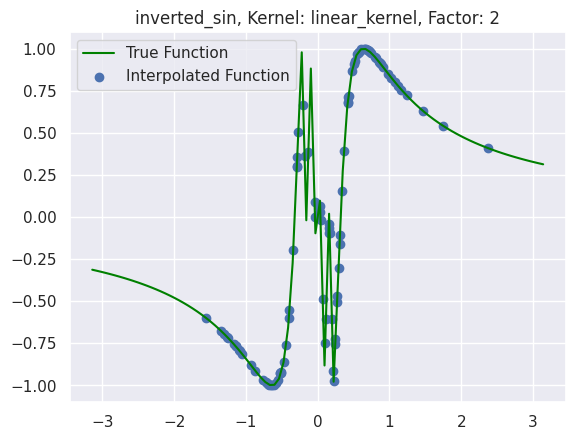

inverted_sin, Kernel: linear_kernel, Factor: 4, MSE: 13.2546%


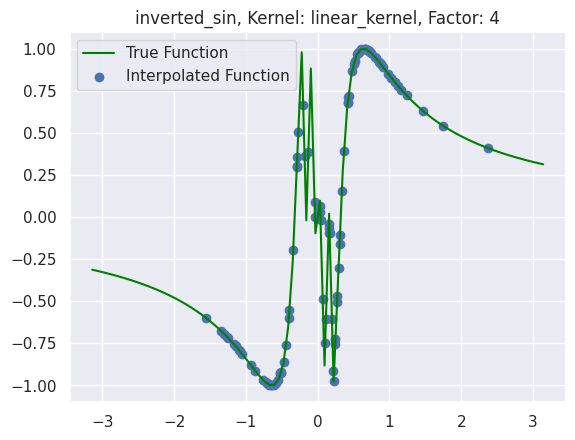

inverted_sin, Kernel: linear_kernel, Factor: 10, MSE: 13.2546%


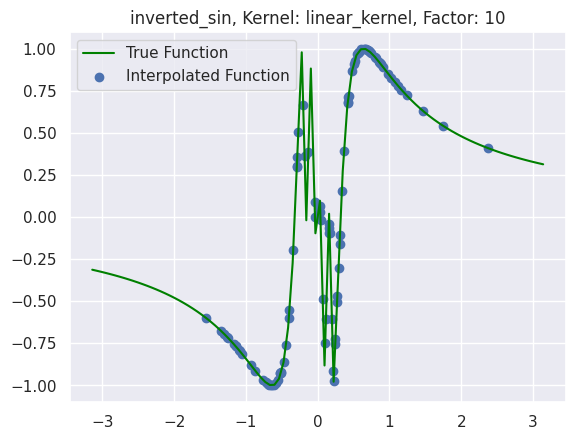

sign_sin, Kernel: h1, Factor: 2, MSE: 16.3299%


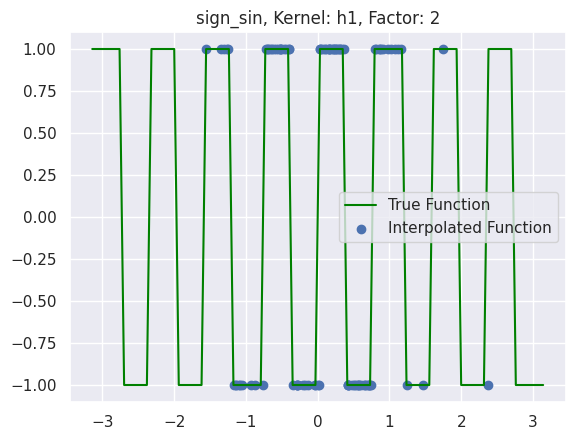

sign_sin, Kernel: h1, Factor: 4, MSE: 16.3299%


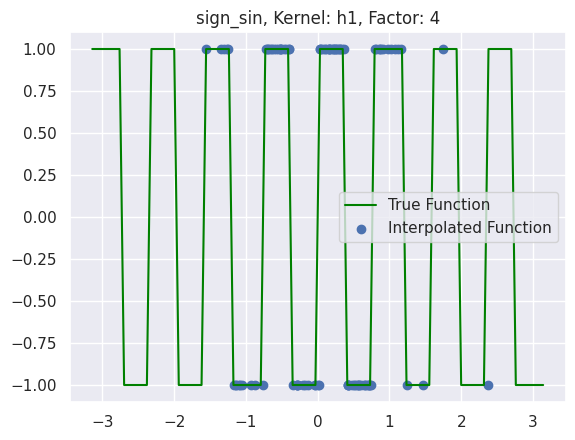

sign_sin, Kernel: h1, Factor: 10, MSE: 16.3299%


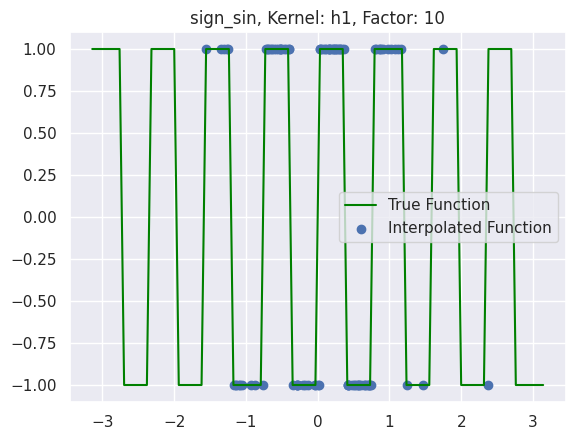

sign_sin, Kernel: linear_kernel, Factor: 2, MSE: 2.7461%


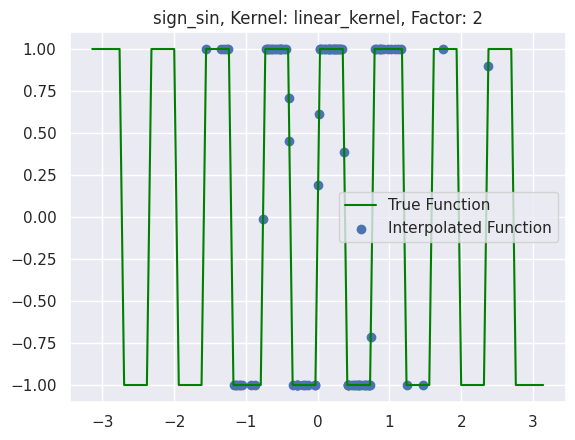

sign_sin, Kernel: linear_kernel, Factor: 4, MSE: 2.7461%


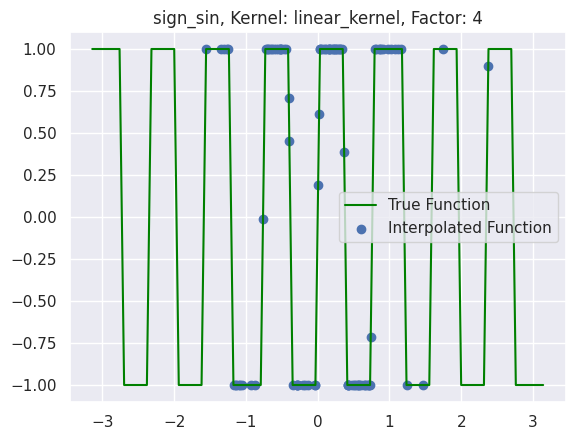

sign_sin, Kernel: linear_kernel, Factor: 10, MSE: 2.7461%


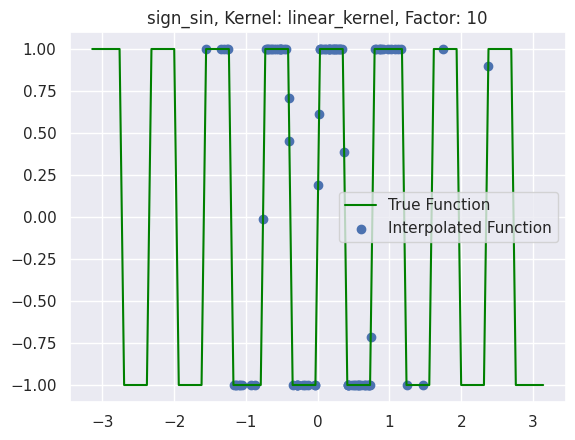

In [ ]:
interpolate_plot_for_x_values(x_range, random_points, [sin, inverted_sin, sign_sin], [h1, linear_kernel], factors, N)